In [2]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
from sklearn import datasets
iris = datasets.load_iris()
keys = list(iris.keys())
for key in keys:
    print(key)

print('\nOpis:\n' + iris.DESCR)

# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych
# Zbiór danych zawiera informacje na temat irysów, w szczególności ich klasyfikacji i wymiarach poszczegónych elementów budowy.
# Częścią zbioru jest także jego opis, zawierający szczegóły na temat zawartych w nim danych, ich pochodzeniu, krótkie podsumowanie statystyk, oraz informacje o autorze.

data
target
target_names
DESCR
feature_names
filename

Opis:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (

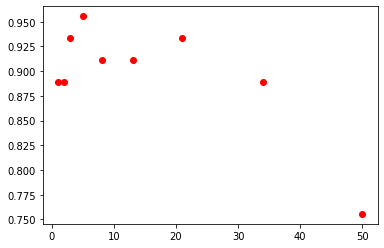

In [7]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

lista_n = [1,2,3,5,8,13,21,34,50]
dokladnosci = []

# Z przykładu:
# Podzielmy zbiór na cechy oraz etykiety
# Konwencja, często spotykana w dokumentacji sklearn to X dla cech oraz y dla etykiet
X = iris.data
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

for n_neighb in lista_n:
    
    # Tworzymy klasyfikator k-NN używając parametru z lista_n
    knn = KNeighborsClassifier(n_neighbors = n_neighb)
       
    # Uczymy klasyfikator na zbiorze uczącym
    knn.fit(X_train, y_train)
    
    # Przewidujemy wartości dla zbioru testowego
    y_pred = knn.predict(X_test)

    # Sprawdzamy dokładność klasyfikatora
    dokladnosc = knn.score(X_test,y_test)
    dokladnosci.append(dokladnosc)

# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.

%matplotlib inline
plt.plot(lista_n, dokladnosci, 'ro')
plt.show()

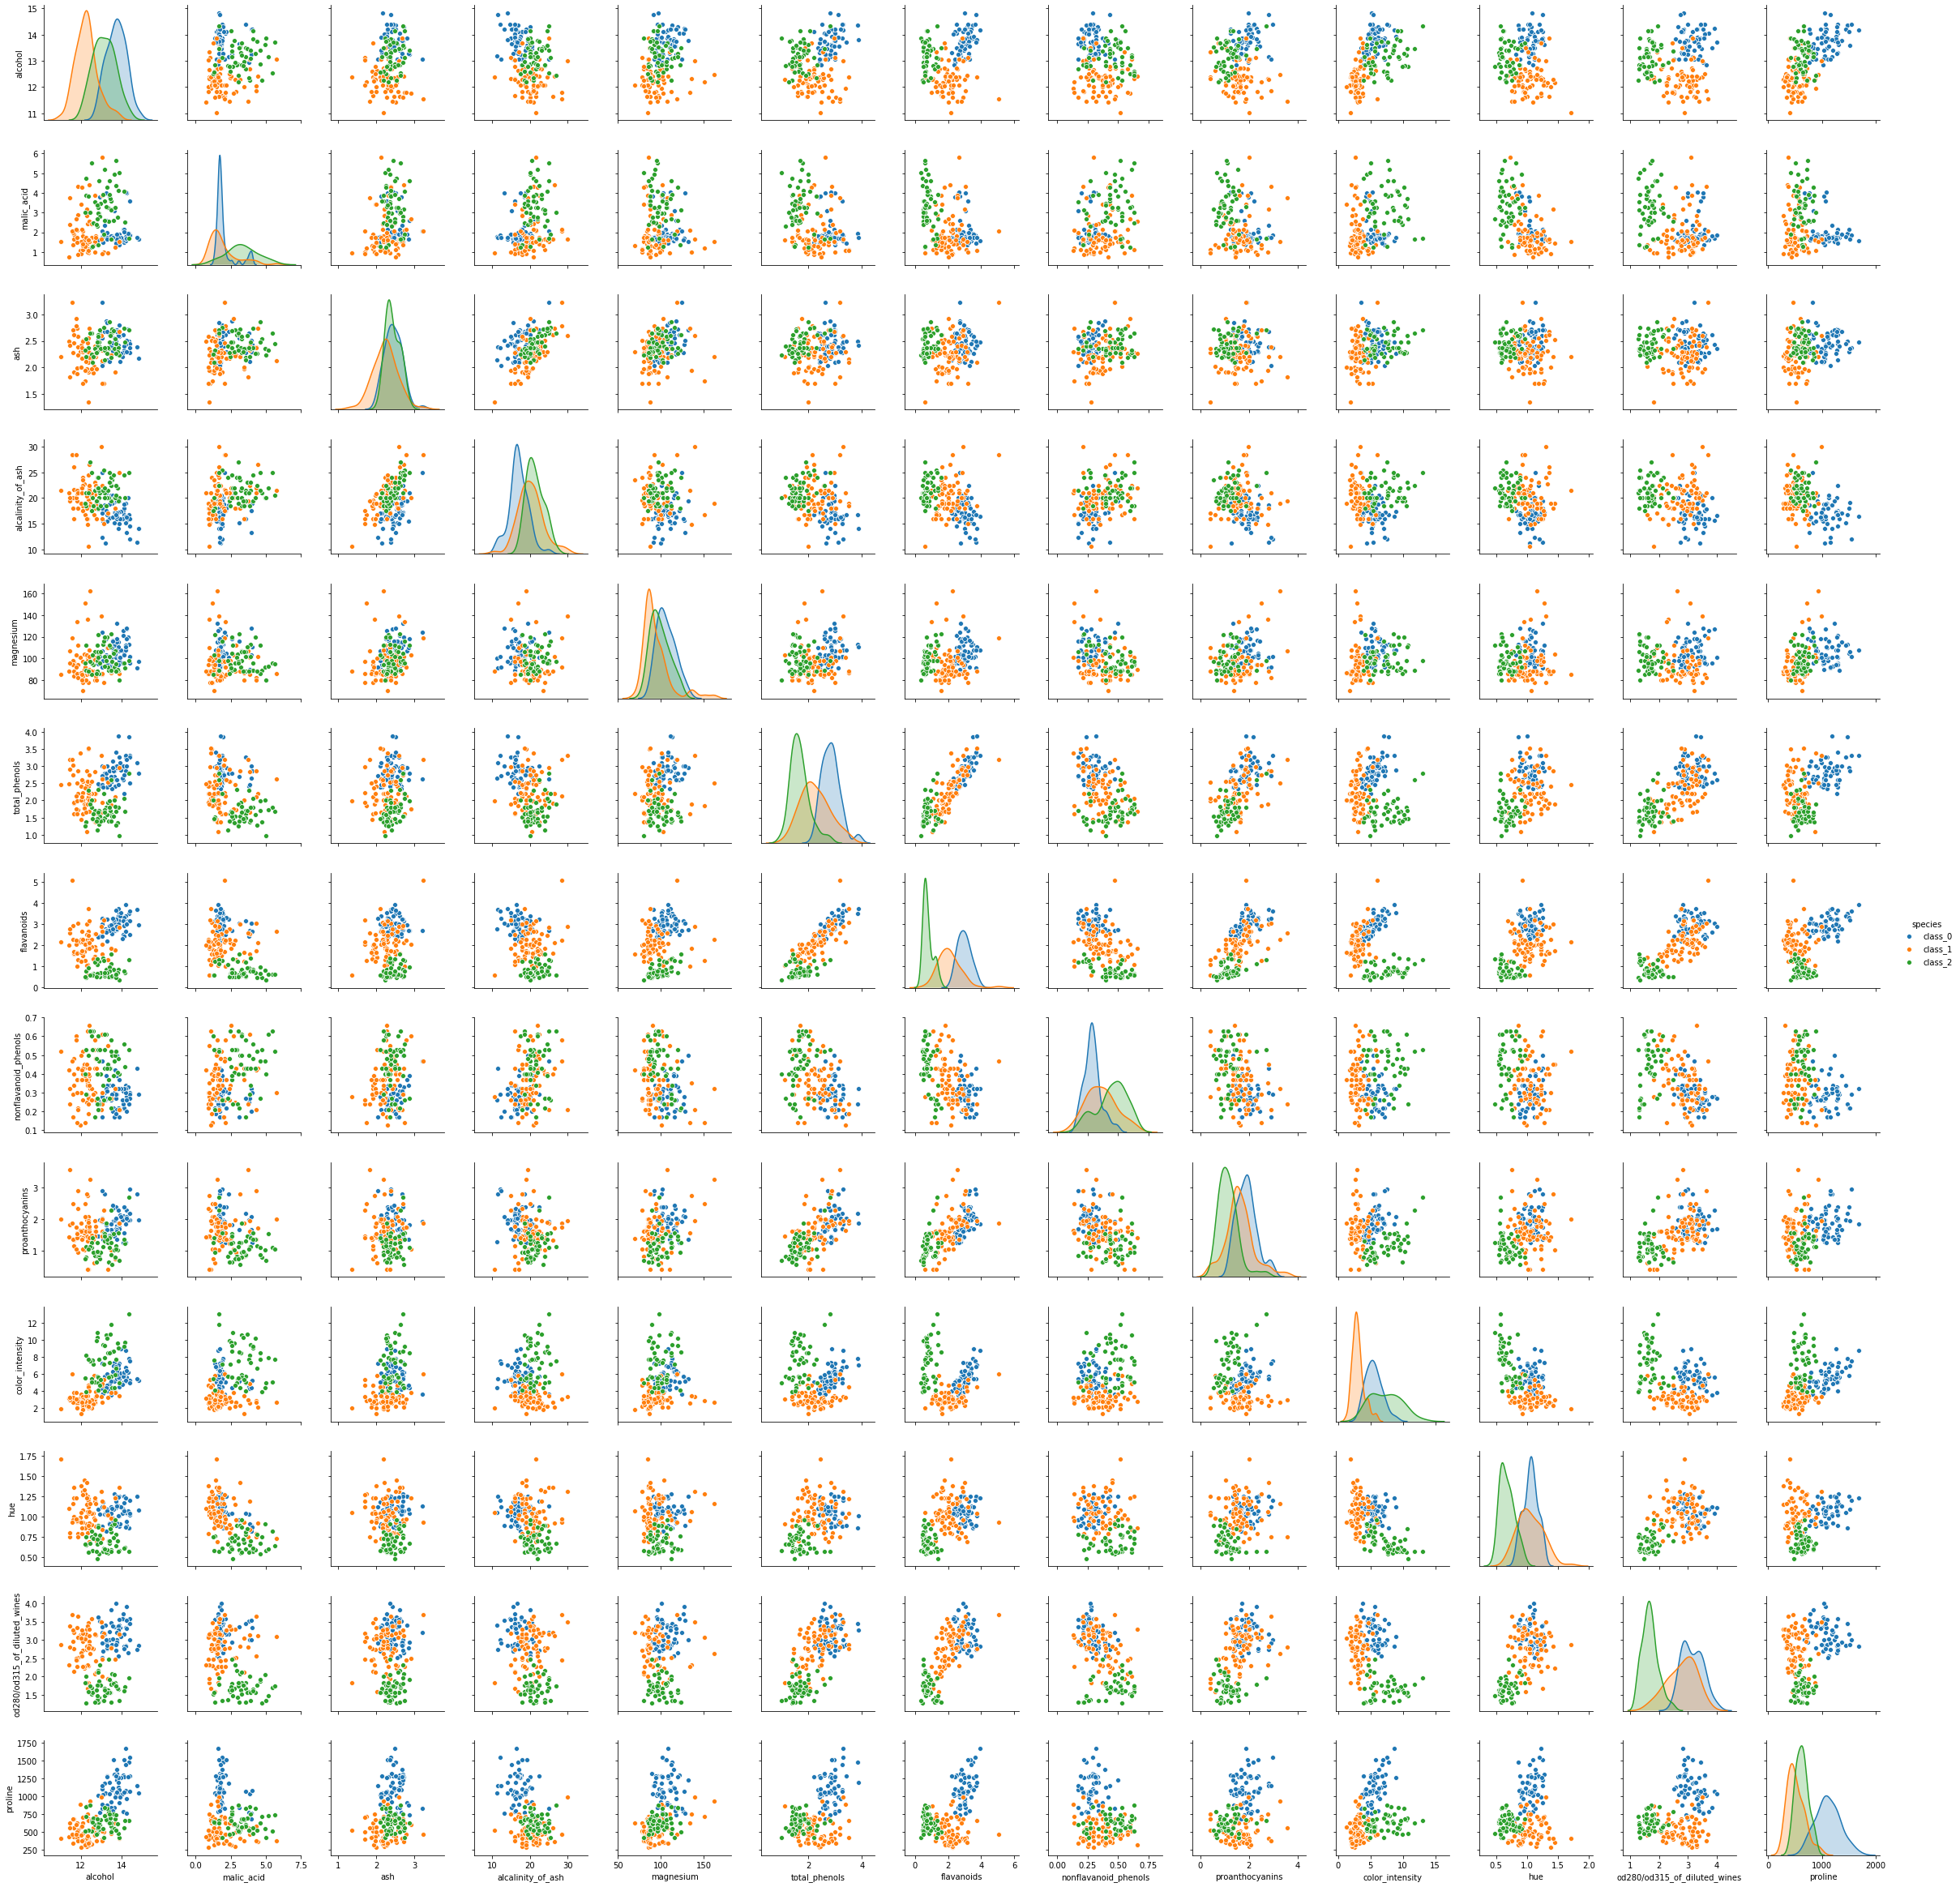

In [12]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine

# Wczytanie:
wine = datasets.load_wine()

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.

# Za przykładem:
# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
import pandas as pd
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy
targets = map(lambda x: wine['target_names'][x], wine['target'] )

# doklejenie informacji o gatunku do reszty dataframe
import numpy as np
wine_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(wine_df, hue='species')
plt.show()


# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Analogicznie do Zadania 2:

X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Wypisz raport z uczenia: confusion_matrix oraz classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Zadanie bonus:
# Wczytaj dane za pomocą funkcji fetch_openml
from sklearn.datasets import fetch_openml
# Funkcja przyjmuje jako parametr nazwę zbioru danych z https://www.openml.org/search?type=data
# Proponuję zbiór 'bank-marketing', ale możesz wybrać dowolny inny z kategorii "klasyfikacja"
# Reszta: jak w zadaniu 3.
